In [ ]:
import numpy as np
import math
from collections import Counter
import matplotlib.pyplot as plt

In [21]:
def encode_dataset (data , target_column):
    """
    Encodes dataset by separating features and labels, and converting labels to integers.
    Args:
        data: List of lists containing the dataset
        target_column: Index of the target colum  
    Returns:
        X: Feature matrix (numpy array)
        y: Encoded labels (numpy array)
        label_encoding: Dictionary mapping original labels to encoded integers
    """

    features = []
    labels = []

    for row in data:
        feature_row = row[:target_column]+row[target_column+1:]
        features.append(feature_row)
        labels.append(row[target_column])

    unique_labels = sorted(list(set(labels)))
    label_encoding = {label : i for i, label in enumerate(unique_labels)} # creates a dictionary of labels and their integer encoding
    y = np.array([label_encoding[label] for label in labels])
    X = np.array(features, dtype='float64')

    return X , y , label_encoding


In [22]:
def euclidean_distance(point1 , point2):
    sum=0
    feature_count = len(point1)
    for index in range(feature_count):
        sum = sum+((point1[index]-point2[index])**2)
    distance = math.sqrt(sum)
    return distance

In [23]:
class KNN_classifier():
    ''''''


    def __init__(self,k=3): # initializing the classifier with number of nearest neighbour to consider
        self.k = k
        self.X_train = None
        self.Y_train = None

    def fit(self , X , y): # fittin all the given data into our classifier, essentially storing it for later use
        self.X_train = X
        self.Y_train = y

    def predict(self, X_test): 
        # Predict labels for all test samples
        return [self.predict_one(x) for x in X_test]
    
    def predict_one(self, x): # returns the most common label of the K-nearest neighbours of the given point x
        
        # Calculates list of all the distances of x to all training samples
        distances = [euclidean_distance(x, data_point) for data_point in self.X_train]

        # sorting the list of distances and getting the indices of k closest points
        k_indices = np.argsort(distances)[:self.k]

        # getting labels of the k closest points
        k_labels = [self.Y_train[i] for i in k_indices]

        # selecting the majority label form the k closest points
        most_common = Counter(k_labels).most_common(1)[0][0]
        return most_common


In [24]:
# provided training data-set
data = [
    [150, 7.0, 1, 'Apple'],
    [120, 6.5, 0, 'Banana'],
    [180, 7.5, 2, 'Orange'],
    [155, 7.2, 1, 'Apple'],
    [110, 6.0, 0, 'Banana'],
    [190, 7.8, 2, 'Orange'],
    [145, 7.1, 1, 'Apple'],
    [115, 6.3, 0, 'Banana']
]

# declaring a new classifier
new_classifier = KNN_classifier(3)

# encoding the data
X , y , label_encoding = encode_dataset(data , 3)

# fitting the data in classifier
new_classifier.fit(X , y)

# test data-set
test_data = np.array([
    [118, 6.2, 0],  # Expected: Banana
    [160, 7.3, 1],  # Expected: Apple
    [185, 7.7, 2]   # Expected: Orange
])

# printing the final output of the test data-set
predictions = new_classifier.predict(test_data)

for i, sample in enumerate(test_data):
    pred = predictions[i]

    # decoding the labels
    if pred == 0:
        label = 'Apple'
    elif pred == 1:
        label = 'Banana'
    elif pred == 2:
        label = 'Orange'
    else:
        label = 'Unknown'

    print(f"Test sample {i+1} : Predicted Label → {label}")

Test sample 1 : Predicted Label → Banana
Test sample 2 : Predicted Label → Apple
Test sample 3 : Predicted Label → Orange



🔍 Plotting for Test Sample 1:


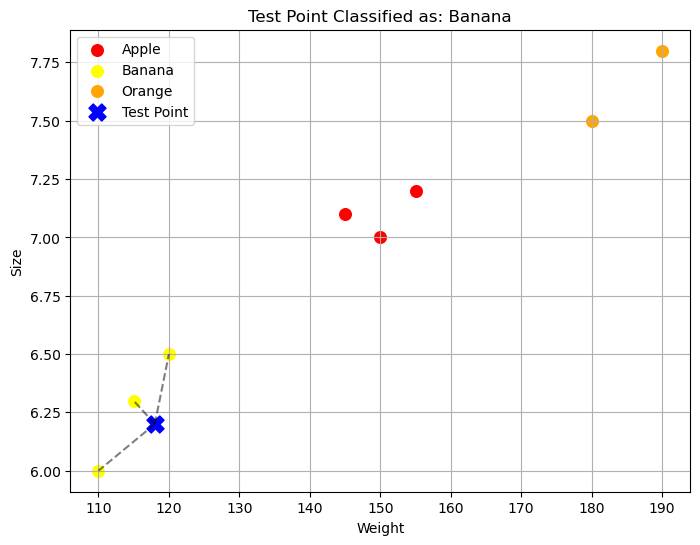


🔍 Plotting for Test Sample 2:


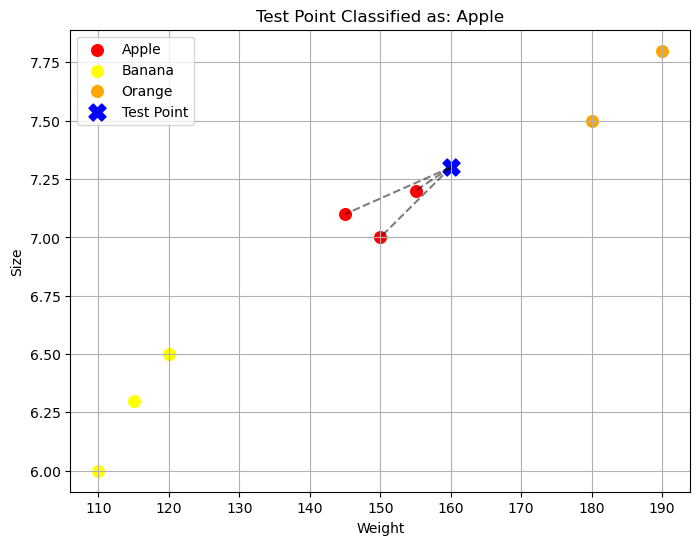


🔍 Plotting for Test Sample 3:


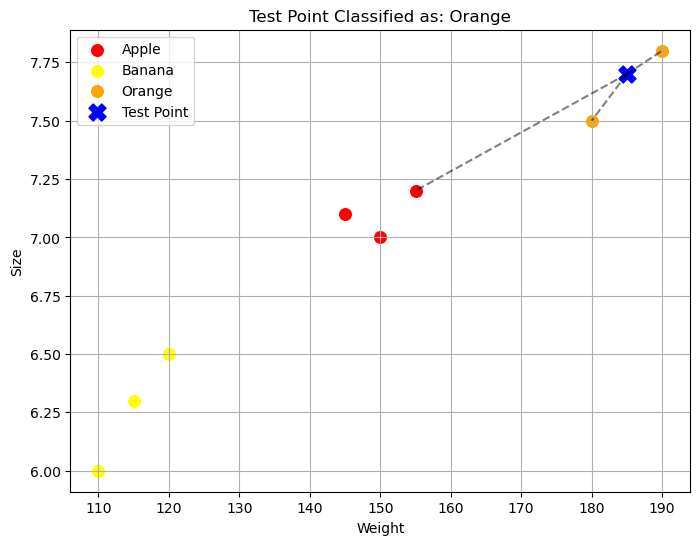

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import math

# Function to plot the working of KNN for a given test sample
def plot_knn_working(classifier, X_train, y_train, test_point, label_encoding, k=3):
    # Reverse the encoding dictionary
    decoding = {v: k for k, v in label_encoding.items()}

    # Predict label + get indices of k nearest neighbors
    distances = [euclidean_distance(test_point, data_point) for data_point in X_train]
    k_indices = np.argsort(distances)[:k]
    k_labels = [y_train[i] for i in k_indices]
    predicted_label = Counter(k_labels).most_common(1)[0][0]

    # Colors for each class
    color_map = {0: 'red', 1: 'yellow', 2: 'orange'}
    label_map = decoding

    plt.figure(figsize=(8, 6))

    # Plot training data
    for i, point in enumerate(X_train):
        plt.scatter(point[0], point[1], 
                    color=color_map[y_train[i]], 
                    label=label_map[y_train[i]] if list(y_train).index(y_train[i]) == i else "",
                    s=70)

    # Plot test point
    plt.scatter(test_point[0], test_point[1], color='blue', marker='X', s=150, label='Test Point')

    # Connect test point to k-nearest neighbors
    for idx in k_indices:
        neighbor = X_train[idx]
        plt.plot([test_point[0], neighbor[0]], [test_point[1], neighbor[1]], 'k--', alpha=0.5)

    plt.title(f"Test Point Classified as: {label_map[predicted_label]}")
    plt.xlabel("Weight")
    plt.ylabel("Size")
    plt.grid(True)
    plt.legend()
    plt.show()

for i, test_point in enumerate(test_data):
    print(f"\n🔍 Plotting for Test Sample {i+1}:")
    plot_knn_working(new_classifier, X, y, test_point, label_encoding, k=3)